# Financial Nightmares: Digging in to Loans
## by Spencer McTavish

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Potential Questions
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?

In [17]:
loans = pd.read_csv('data/prosperLoanData.csv')
loans_def=pd.read_csv('data/prosperLoanData-def.csv')

In [18]:
loans.shape

(113937, 81)

In [19]:
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
86636,5D6935773284542000DF9EF,762845,2013-04-29 08:19:11.640000000,NaN,60,Current,NaN,0.24282,0.2179,0.2079,...,-87.67,0.0,0.00,0.00,0.0,1.0,0,0,0.0,138
48733,EB2D355692085523757CA4E,640530,2012-09-17 10:15:30.473000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.93,0.0,0.00,0.00,0.0,1.0,0,0,0.0,22
3266,954E3419412408125CE40D6,329805,2008-05-10 04:42:28.290000000,A,36,Completed,2010-10-15 00:00:00,0.17813,0.1600,0.1500,...,-12.99,0.0,0.00,0.00,0.0,1.0,0,0,0.0,13
25607,694C36042392640493F357D,1239756,2014-02-28 11:27:51.960000000,NaN,36,Current,NaN,0.22659,0.1890,0.1790,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
29752,B90C3386826472170015E63,122093,2007-04-11 11:23:58.897000000,C,36,Completed,2008-08-12 00:00:00,0.15211,0.1450,0.1350,...,-51.22,0.0,0.00,0.00,0.0,1.0,0,0,0.0,170
86864,23A335596028582061B0147,652204,2012-10-09 12:53:14.930000000,NaN,60,Defaulted,2013-12-16 00:00:00,0.33709,0.3097,0.2997,...,-29.02,0.0,3712.23,3712.23,0.0,1.0,0,0,0.0,36
7660,5BA735331860758214EB839,541048,2011-11-25 15:04:09.177000000,NaN,36,Completed,2012-05-08 00:00:00,0.35090,0.3108,0.3008,...,-31.62,0.0,0.00,0.00,0.0,1.0,0,0,0.0,22
8233,92BF3581022053203F07354,799888,2013-06-06 10:42:51.103000000,NaN,36,Current,NaN,0.13138,0.1034,0.0934,...,-79.85,0.0,0.00,0.00,0.0,1.0,0,0,0.0,221
49379,9B593496217268411FF5B3C,477732,2010-10-01 09:10:55.743000000,NaN,36,Completed,2011-11-29 00:00:00,0.36113,0.3100,0.3000,...,-7.52,0.0,0.00,0.00,0.0,1.0,0,0,0.0,61
3511,4A6F35956835844780537D9,1056252,2013-11-26 17:37:59.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,-6.74,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1


In [10]:
loans_def

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Ch..."
6,ClosedDate,"Closed date is applicable for Cancelled, Compl..."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is ...


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [14]:
loans.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

KeyboardInterrupt: 

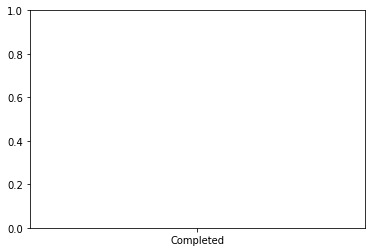

In [15]:
plt.hist(x=loans.LoanStatus)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!